In [3]:
#Senior Design Data Processing Example
import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('Saved1.csv', dtype={'Distance1 (in)': int})

<ipython-input-4-66debfc2164c>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('Saved1.csv', dtype={'Distance1 (in)': int})


In [5]:
newData = dataset.drop(labels=range(0, 6), axis=0)

In [6]:
newData = newData[['Unnamed: 2']]

In [7]:
newData['Unnamed: 2']=newData['Unnamed: 2'].astype(float)

In [8]:
newData

,Unnamed: 2
6,-1.000000e+10
7,-1.000000e+10
8,-1.000000e+10
9,-1.000000e+10
10,-1.000000e+10
...,...
60002,-1.000000e+10
60003,-1.000000e+10
60004,-1.000000e+10
60005,-1.000000e+10


In [9]:
#Take datapoints from csv file into data_set_array
data_set_array = newData['Unnamed: 2']
m = len(data_set_array);
n = m-1;

In [10]:
m

60001

In [11]:
data_set_array

6       -1.000000e+10
7       -1.000000e+10
8       -1.000000e+10
9       -1.000000e+10
10      -1.000000e+10
             ...     
60002   -1.000000e+10
60003   -1.000000e+10
60004   -1.000000e+10
60005   -1.000000e+10
60006   -1.000000e+10
Name: Unnamed: 2, Length: 60001, dtype: float64

In [12]:
m, n

(60001, 60000)

In [13]:
#Data processing to take the points at the tip of the blade (minimum values)

sample_plot = []

In [14]:


#Compare previous, present, and future values and append the minimum value to the new array
for (iteration) in range(m):
    # print(current_low)
    if iteration == 8:
        pass
        # print("We are starting to process the data")
    elif iteration < 8:
        pass
        # print("We're getting ready")
    elif iteration == n:
        pass
        print("This is the end of the array", iteration)
    else:
        sample_plot.append(data_set_array[iteration])

This is the end of the array 60000


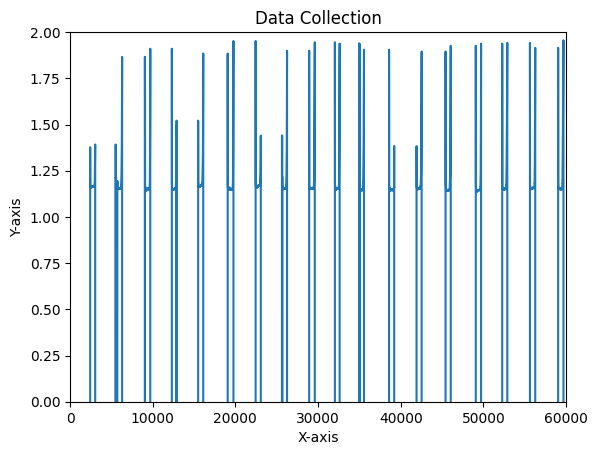

In [15]:
plt.plot(sample_plot)

plt.title('Data Collection')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.xlim(0, m)
plt.ylim(0, 2)

plt.show()

In [16]:
threshold_start = 1.3
threshold_end = 0
current_low = 10000

tip_detected = 0 #BOOLEAN 
skips = 0 #SKIP ITERATION
iteration_holder = 0
data_blade_tips = []

In [17]:


#Compare previous, present, and future values and append the minimum value to the new array
for iteration in range(m):
    if(skips > 0):
        skips = skips - 1
    else:
        if iteration == 8:
            print("We are starting to process the data")
        elif iteration < 8:
            print("We are starting to process the data")
        elif iteration == n:
            print("We're getting ready")
        elif ((data_set_array[iteration] < threshold_start) and (data_set_array[iteration+1] < threshold_start) and (data_set_array[iteration] > 0)):
            iteration_holder = iteration
            print(iteration_holder, 'Good', data_set_array[iteration_holder])
            while ((data_set_array[iteration_holder] < threshold_start)):
                if (data_set_array[iteration_holder] < current_low):
                    current_low = data_set_array[iteration_holder]
                    print("Current Low:", current_low)
                iteration_holder = iteration_holder + 1
            print("Not in while loop")
            skips = iteration_holder - iteration
            if current_low < 0:
                pass
            else:
                data_blade_tips.append(current_low)
        else:
            current_low = 10000

We are starting to process the data
We are starting to process the data
We are starting to process the data
We are starting to process the data
We are starting to process the data
We are starting to process the data
We are starting to process the data
We are starting to process the data
We are starting to process the data
2451 Good 1.194
Current Low: 1.194
Current Low: 1.192
Current Low: 1.191
Current Low: 1.19
Current Low: 1.188
Current Low: 1.187
Current Low: 1.186
Current Low: 1.185
Current Low: 1.183
Current Low: 1.182
Current Low: 1.181
Current Low: 1.18
Current Low: 1.179
Current Low: 1.178
Current Low: 1.177
Current Low: 1.176
Current Low: 1.175
Current Low: 1.174
Current Low: 1.173
Current Low: 1.172
Current Low: 1.17
Current Low: 1.169
Current Low: 1.168
Current Low: 1.167
Current Low: 1.166
Current Low: 1.165
Current Low: 1.164
Current Low: 1.163
Current Low: 1.162
Current Low: 1.161
Current Low: 1.16
Current Low: 1.159
Not in while loop
5532 Good 1.209
Current Low: 1.209
Cur

In [18]:
len(data_blade_tips)

16

In [19]:
data_blade_tips

[1.159,
 1.139,
 1.148,
 1.162,
 1.147,
 1.159,
 1.15,
 1.15,
 1.148,
 1.142,
 1.149,
 1.141,
 1.137,
 1.148,
 1.15,
 1.148]

# Calculating blade lengths

In [31]:
blindspot = 1.1811
A = float(input("What is the journal's radius: "))
B = float(input("What is the sensor distance from the journal: "))
C = B + blindspot
D = float(input("What's the distance from the journal sensor to the blade sensor of the frame: "))
D = D + blindspot

totalDistance = A + C + D

data_blade_length = []

x = len(data_blade_tips)
for iteration in range(x):
  blade_length = totalDistance - (data_blade_tips[iteration] + blindspot)
  data_blade_length.append(blade_length)

What is the journal's radius: 10
What is the sensor distance from the journal: 2
What's the distance from the journal sensor to the blade sensor of the frame: 30


In [33]:
#Writing the array to an excel sheet
df = pd.DataFrame(data_blade_length)
df.to_excel(r"Data.xlsx")